In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10_dataset= keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x=np.concatenate((x_train, x_test),axis=0)
y=np.concatenate((y_train, y_test), axis=0)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test_temp, y_train, y_test_temp = train_test_split(x, y, test_size=0.15, random_state=42)

In [6]:
x_val, x_test, y_val, y_test = train_test_split(x_test_temp, y_test_temp, test_size=.5, random_state=42)

In [ ]:
X_train = x_train/255
X_test = x_test/255
X_val= x_val/255

X_train.shape

(51000, 32, 32, 3)

Model

In [ ]:
model__= keras.Sequential()

model__.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model__.add(keras.layers.MaxPooling2D((2, 2)))

model__.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model__.add(keras.layers.MaxPooling2D((2, 2)))



model__.add(keras.layers.Flatten(input_shape=[32,32,3]))
model__.add(keras.layers.Dropout(.35))



model__.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [ ]:
model__.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9)
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist__=model__.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),batch_size=64)

Epoch 1/50
797/797 [==============================] - 4s 5ms/step - loss: 1.7314 - accuracy: 0.3784 - val_loss: 1.3841 - val_accuracy: 0.4931
Epoch 2/50
797/797 [==============================] - 4s 5ms/step - loss: 1.3850 - accuracy: 0.5070 - val_loss: 1.2280 - val_accuracy: 0.5667
Epoch 3/50
797/797 [==============================] - 4s 5ms/step - loss: 1.2524 - accuracy: 0.5573 - val_loss: 1.1600 - val_accuracy: 0.5938
Epoch 4/50
797/797 [==============================] - 3s 4ms/step - loss: 1.1504 - accuracy: 0.5959 - val_loss: 1.0709 - val_accuracy: 0.6280
Epoch 5/50
797/797 [==============================] - 3s 4ms/step - loss: 1.0925 - accuracy: 0.6141 - val_loss: 1.0311 - val_accuracy: 0.6382
Epoch 6/50
797/797 [==============================] - 4s 5ms/step - loss: 1.0489 - accuracy: 0.6340 - val_loss: 0.9898 - val_accuracy: 0.6560
Epoch 7/50
797/797 [==============================] - 3s 4ms/step - loss: 1.0157 - accuracy: 0.6434 - val_loss: 0.9983 - val_accuracy: 0.6538
Epoch 

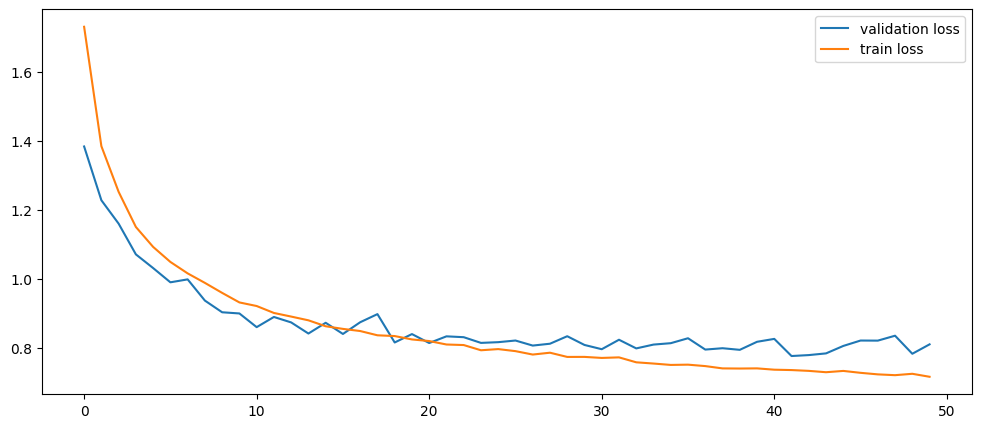

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__.history["val_loss"], label="validation loss")
ax.plot(hist__.history["loss"], label="train loss")
ax.legend()

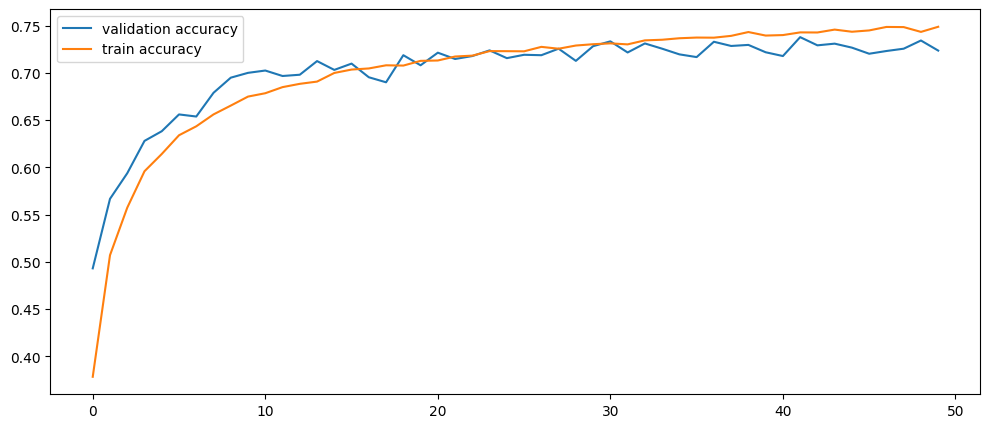

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__.history["val_accuracy"], label="validation accuracy")
ax.plot(hist__.history["accuracy"], label="train accuracy")

ax.legend()

###  **Exponential Model**

In [ ]:
def exp_lr_func(eta0, s):
  def exp_lr(epoch):
    return eta0*0.1**(epoch/s)
  return exp_lr
exp_lr_s = exp_lr_func(0.01, 50)

In [ ]:
exp_lr_c = keras.callbacks.LearningRateScheduler(exp_lr_s)

In [ ]:
model__.compile(optimizer="sgd"
              ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist__2=model__.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),callbacks=[exp_lr_c])

Epoch 1/50
1594/1594 [==============================] - 8s 5ms/step - loss: 1.8281 - accuracy: 0.3466 - val_loss: 1.5574 - val_accuracy: 0.4544 - lr: 0.0100
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 1.4973 - accuracy: 0.4677 - val_loss: 1.3882 - val_accuracy: 0.5140 - lr: 0.0095
Epoch 3/50
1594/1594 [==============================] - 7s 4ms/step - loss: 1.3719 - accuracy: 0.5173 - val_loss: 1.3031 - val_accuracy: 0.5413 - lr: 0.0091
Epoch 4/50
1594/1594 [==============================] - 7s 4ms/step - loss: 1.2906 - accuracy: 0.5475 - val_loss: 1.2170 - val_accuracy: 0.5733 - lr: 0.0087
Epoch 5/50
1594/1594 [==============================] - 7s 4ms/step - loss: 1.2435 - accuracy: 0.5669 - val_loss: 1.1767 - val_accuracy: 0.5936 - lr: 0.0083
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 1.1928 - accuracy: 0.5845 - val_loss: 1.1893 - val_accuracy: 0.5911 - lr: 0.0079
Epoch 7/50
1594/1594 [==============================] - 7s

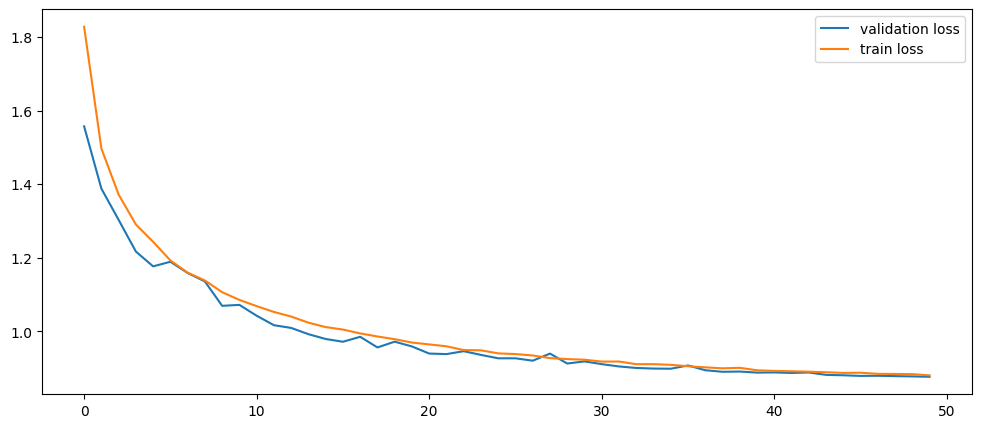

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__2.history["val_loss"], label="validation loss")
ax.plot(hist__2.history["loss"], label="train loss")
ax.legend()

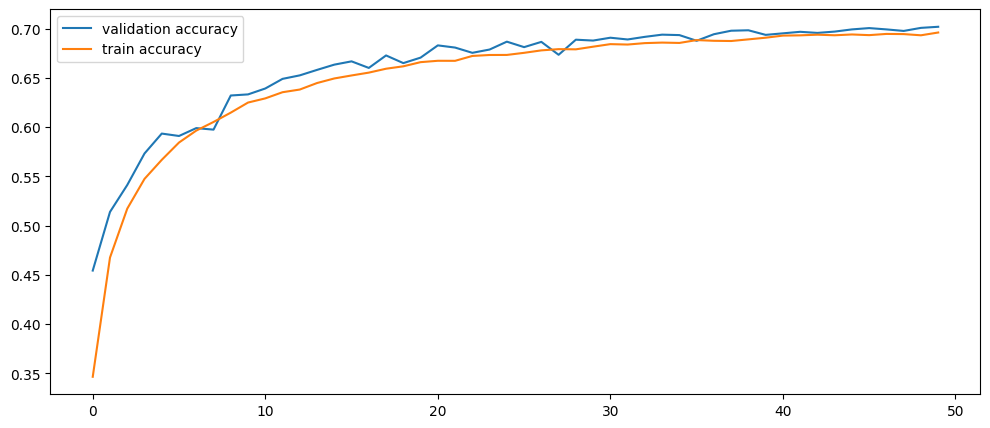

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__2.history["val_accuracy"], label="validation accuracy")
ax.plot(hist__2.history["accuracy"], label="train accuracy")

ax.legend()

### **1cycle lr**

In [ ]:
class Exp_lr(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.lr = []
    self.loss = []

  def on_epoch_begin(self, epoch, logs):
    self.previous_loss = 0

  def on_batch_end(self, batch, logs):
    current_loss = logs["loss"]*(batch+1) - self.previous_loss*batch
    self.previous_loss = logs["loss"]
    self.lr.append(keras.backend.get_value(self.model.optimizer.learning_rate))
    self.loss.append(current_loss)
    keras.backend.set_value(self.model.optimizer.learning_rate,
                            self.model.optimizer.learning_rate*self.factor)

In [ ]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32,
                   min_lr = 1e-6, max_lr = 10):
  model_weights = model.get_weights()
  iterations = int(X.shape[0]/batch_size)*epochs
  factor = np.exp(np.log(max_lr/min_lr)/iterations)
  initial_lr = keras.backend.get_value(model.optimizer.learning_rate)
  keras.backend.set_value(model.optimizer.learning_rate, min_lr)
  epx_lr = Exp_lr(factor)
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                      callbacks=[epx_lr])
  keras.backend.set_value(model.optimizer.learning_rate, initial_lr)
  model.set_weights(model_weights)
  return epx_lr.lr, epx_lr.loss

In [ ]:
lr, loss = search_lr_loss(model__, X_train, y_train)

1594/1594 [==============================] - 8s 5ms/step - loss: 2.5048 - accuracy: 0.5275


(0.0, 5.0)

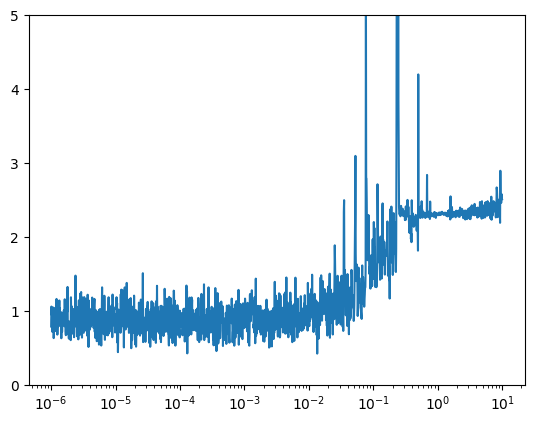

In [ ]:
plt.plot(lr, loss)
plt.xscale("log")
plt.ylim(0, 5)

In [ ]:
class One_cycle_lr(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 10
    self.final_steps = final_steps or int(iterations/10)+1
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000
    self.iteration = 0

  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1

  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    keras.backend.set_value(self.model.optimizer.learning_rate, lr)

In [ ]:
model__= keras.Sequential()
model__.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model__.add(keras.layers.MaxPooling2D((2, 2)))

model__.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model__.add(keras.layers.MaxPooling2D((2, 2)))



model__.add(keras.layers.Flatten(input_shape=[32,32,3]))
model__.add(keras.layers.Dropout(.35))

model__.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [ ]:
model__.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 32
iters = int(x_train.shape[0]/batch_size)*epochs
one_cycle_lr = One_cycle_lr(iters, max_lr=0.007)
history_onecycle = model__.fit(X_train, y_train,
                             validation_split=0.15,
                             epochs=epochs,
                             callbacks=[one_cycle_lr])

Epoch 1/50
1355/1355 [==============================] - 8s 5ms/step - loss: 2.2511 - accuracy: 0.1629 - val_loss: 2.1128 - val_accuracy: 0.2617
Epoch 2/50
1355/1355 [==============================] - 7s 5ms/step - loss: 2.0474 - accuracy: 0.2599 - val_loss: 1.9361 - val_accuracy: 0.3331
Epoch 3/50
1355/1355 [==============================] - 6s 5ms/step - loss: 1.9075 - accuracy: 0.3181 - val_loss: 1.8157 - val_accuracy: 0.3631
Epoch 4/50
1355/1355 [==============================] - 8s 6ms/step - loss: 1.8009 - accuracy: 0.3603 - val_loss: 1.7172 - val_accuracy: 0.4021
Epoch 5/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.7084 - accuracy: 0.3920 - val_loss: 1.6279 - val_accuracy: 0.4244
Epoch 6/50
1355/1355 [==============================] - 7s 5ms/step - loss: 1.6358 - accuracy: 0.4182 - val_loss: 1.5639 - val_accuracy: 0.4495
Epoch 7/50
1355/1355 [==============================] - 9s 6ms/step - loss: 1.5772 - accuracy: 0.4366 - val_loss: 1.5132 - val_accuracy:

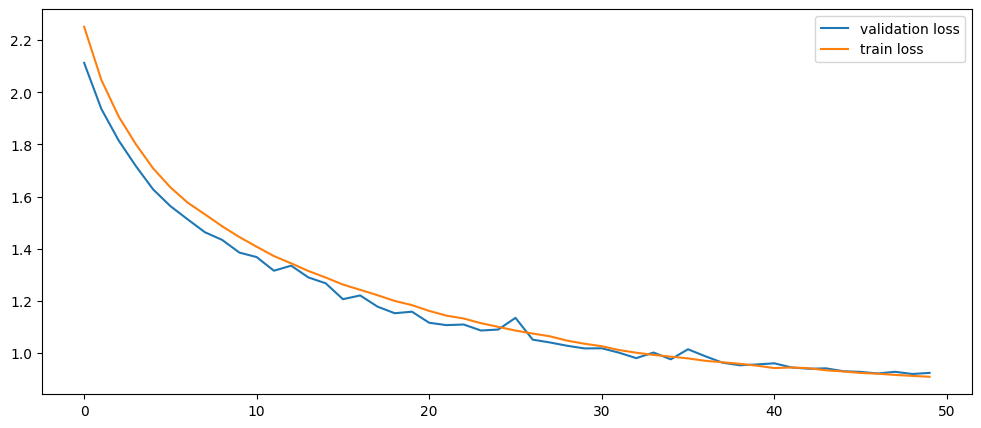

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["val_loss"], label="validation loss")
ax.plot(history_onecycle.history["loss"], label="train loss")
ax.legend()

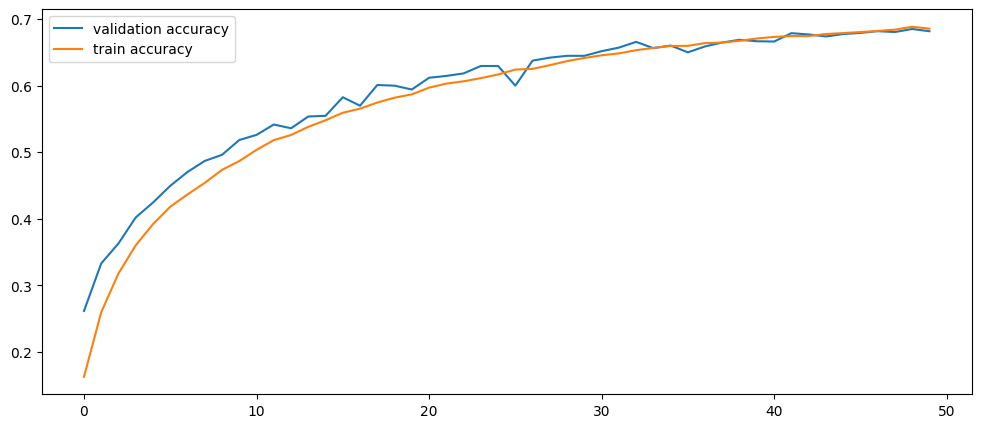

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_onecycle.history["val_accuracy"], label="validation accuracy")
ax.plot(history_onecycle.history["accuracy"], label="train accuracy")

ax.legend()

### Model without pooling layer

In [ ]:
model__2= keras.Sequential()

model__2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model__2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))



model__2.add(keras.layers.Flatten(input_shape=[32,32,3]))
model__2.add(keras.layers.Dropout(.35))



model__2.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [ ]:
model__2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
hist__22=model__2.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),batch_size=64)

Epoch 1/50
797/797 [==============================] - 5s 6ms/step - loss: 0.7302 - accuracy: 0.7489 - val_loss: 1.0001 - val_accuracy: 0.6536
Epoch 2/50
797/797 [==============================] - 7s 9ms/step - loss: 0.7055 - accuracy: 0.7557 - val_loss: 1.0141 - val_accuracy: 0.6491
Epoch 3/50
797/797 [==============================] - 5s 6ms/step - loss: 0.6927 - accuracy: 0.7606 - val_loss: 1.0006 - val_accuracy: 0.6560
Epoch 4/50
797/797 [==============================] - 5s 6ms/step - loss: 0.6755 - accuracy: 0.7684 - val_loss: 1.0186 - val_accuracy: 0.6516
Epoch 5/50
797/797 [==============================] - 4s 5ms/step - loss: 0.6598 - accuracy: 0.7710 - val_loss: 1.0109 - val_accuracy: 0.6518
Epoch 6/50
797/797 [==============================] - 4s 5ms/step - loss: 0.6449 - accuracy: 0.7779 - val_loss: 1.0174 - val_accuracy: 0.6513
Epoch 7/50
797/797 [==============================] - 4s 6ms/step - loss: 0.6344 - accuracy: 0.7805 - val_loss: 1.0344 - val_accuracy: 0.6522
Epoch 

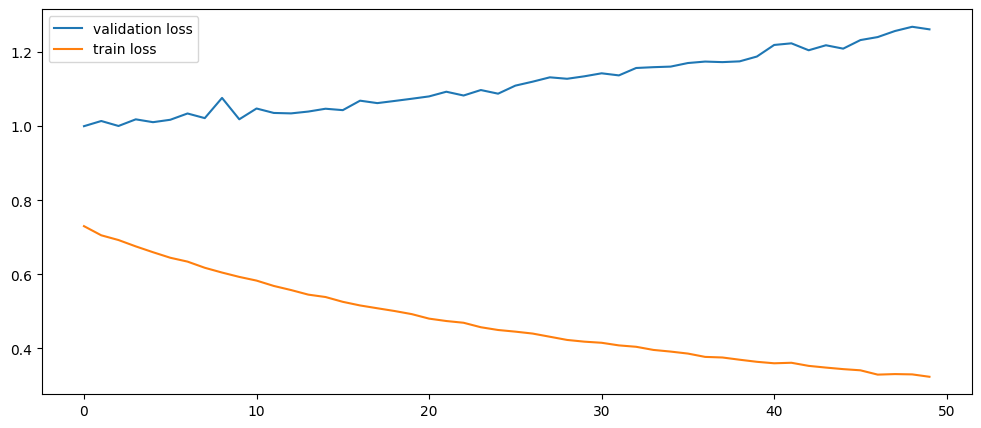

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__22.history["val_loss"], label="validation loss")
ax.plot(hist__22.history["loss"], label="train loss")
ax.legend()

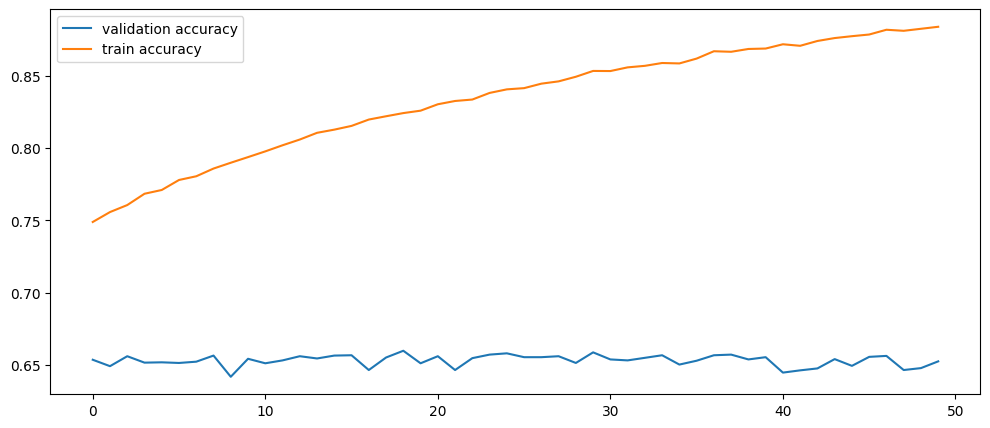

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__22.history["val_accuracy"], label="validation accuracy")
ax.plot(hist__22.history["accuracy"], label="train accuracy")

ax.legend()

### **Pooling  Model stride 2 **

In [ ]:
model__3= keras.Sequential()

model__3.add(keras.layers.Conv2D(32, (3, 3),strides=(2,2) ,activation='relu', kernel_initializer='he_uniform', padding='same'))
model__3.add(keras.layers.MaxPooling2D((2, 2)))

model__3.add(keras.layers.Conv2D(32, (3, 3), strides=(2,2),activation='relu', kernel_initializer='he_uniform', padding='same'))
model__3.add(keras.layers.MaxPooling2D((2, 2)))



model__3.add(keras.layers.Flatten(input_shape=[32,32,3]))
model__3.add(keras.layers.Dropout(.35))



model__3.add(keras.layers.Dense(units =10, activation = 'softmax' ))

In [ ]:
model__3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
hist__3=model__3.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),batch_size=64)

Epoch 1/50
797/797 [==============================] - 13s 16ms/step - loss: 2.1993 - accuracy: 0.1869 - val_loss: 2.0575 - val_accuracy: 0.2667
Epoch 2/50
797/797 [==============================] - 12s 16ms/step - loss: 2.0169 - accuracy: 0.2608 - val_loss: 1.9244 - val_accuracy: 0.3196
Epoch 3/50
797/797 [==============================] - 13s 17ms/step - loss: 1.9286 - accuracy: 0.3001 - val_loss: 1.8495 - val_accuracy: 0.3513
Epoch 4/50
797/797 [==============================] - 12s 16ms/step - loss: 1.8669 - accuracy: 0.3258 - val_loss: 1.8136 - val_accuracy: 0.3609
Epoch 5/50
797/797 [==============================] - 13s 17ms/step - loss: 1.8229 - accuracy: 0.3403 - val_loss: 1.7667 - val_accuracy: 0.3760
Epoch 6/50
797/797 [==============================] - 13s 16ms/step - loss: 1.7881 - accuracy: 0.3519 - val_loss: 1.7432 - val_accuracy: 0.3822
Epoch 7/50
797/797 [==============================] - 12s 15ms/step - loss: 1.7627 - accuracy: 0.3636 - val_loss: 1.7121 - val_accuracy:

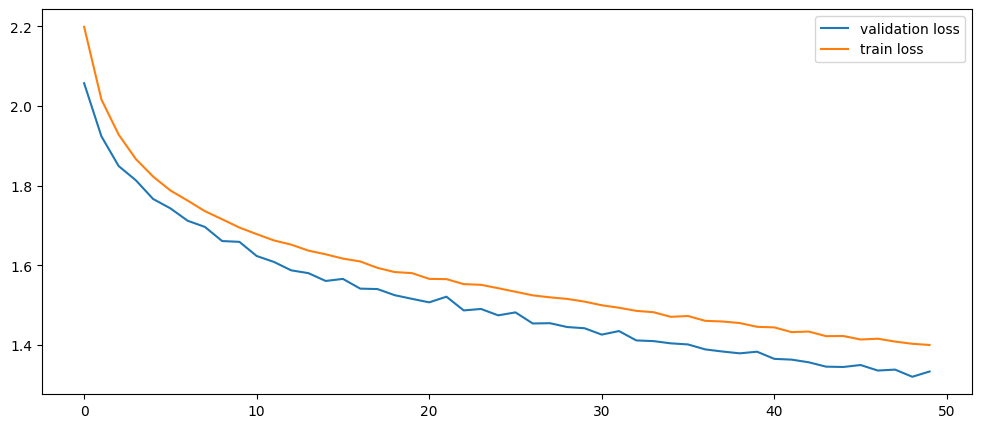

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__3.history["val_loss"], label="validation loss")
ax.plot(hist__3.history["loss"], label="train loss")
ax.legend()

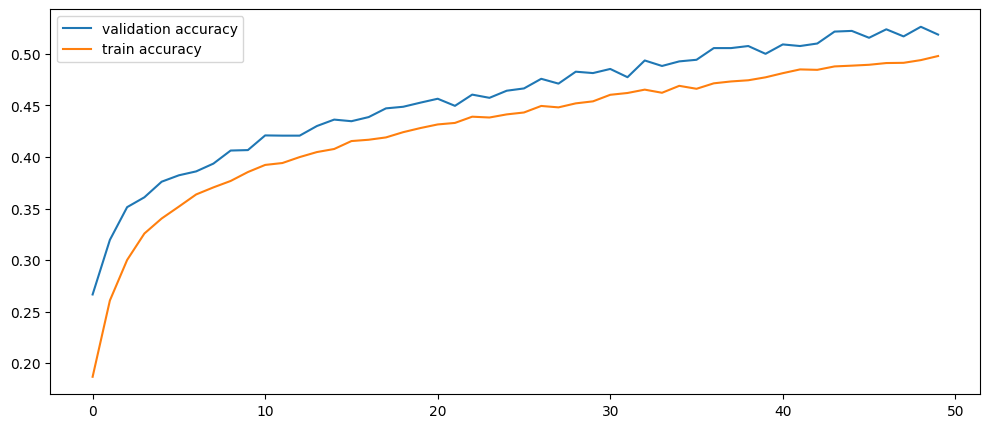

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__3.history["val_accuracy"], label="validation accuracy")
ax.plot(hist__3.history["accuracy"], label="train accuracy")

ax.legend()

### ResNet50 Model and freeze all of layers

In [15]:
ResNet50_base = keras.applications.ResNet50(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(ResNet50_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model__5 = keras.Model(inputs=ResNet50_base.input, outputs=output)

In [16]:
for layer in ResNet50_base.layers:
  layer.trainable = False


In [17]:
model__5.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
model__5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [13]:
x_train_new=keras.applications.resnet.preprocess_input(x_train)

In [19]:
hist__5 =model__5.fit(x_train_new, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1355/1355 [==============================] - 21s 13ms/step - loss: 1.5994 - accuracy: 0.5700 - val_loss: 1.3843 - val_accuracy: 0.6169
Epoch 2/50
1355/1355 [==============================] - 17s 12ms/step - loss: 1.2255 - accuracy: 0.6438 - val_loss: 1.3964 - val_accuracy: 0.6190
Epoch 3/50
1355/1355 [==============================] - 17s 13ms/step - loss: 1.1435 - accuracy: 0.6627 - val_loss: 1.4290 - val_accuracy: 0.6195
Epoch 4/50
1355/1355 [==============================] - 17s 12ms/step - loss: 1.1064 - accuracy: 0.6726 - val_loss: 1.5015 - val_accuracy: 0.6081
Epoch 5/50
1355/1355 [==============================] - 16s 12ms/step - loss: 1.0931 - accuracy: 0.6796 - val_loss: 1.5115 - val_accuracy: 0.6210
Epoch 6/50
1355/1355 [==============================] - 16s 12ms/step - loss: 1.0878 - accuracy: 0.6853 - val_loss: 1.5970 - val_accuracy: 0.6144
Epoch 7/50
1355/1355 [==============================] - 17s 12ms/step - loss: 1.0676 - accuracy: 0.6877 - val_loss: 1.5918 -

## **ResNet50  Model and freeze all of layers except  last layer

In [25]:
ResNet50_base_1 = keras.applications.ResNet50(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(ResNet50_base_1.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model__6 = keras.Model(inputs=ResNet50_base_1.input, outputs=output)

In [26]:
for layer in ResNet50_base_1.layers[:-1]:
  layer.trainable = False



In [27]:
ResNet50_base_1.layers[-1].trainable

True

In [28]:
model__6.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [29]:
model__6.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
hist__6 =model__6.fit(x_train_new, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1355/1355 [==============================] - 22s 14ms/step - loss: 1.5956 - accuracy: 0.5702 - val_loss: 1.4503 - val_accuracy: 0.5873
Epoch 2/50
1355/1355 [==============================] - 17s 13ms/step - loss: 1.2189 - accuracy: 0.6439 - val_loss: 1.4044 - val_accuracy: 0.6179
Epoch 3/50
1355/1355 [==============================] - 17s 12ms/step - loss: 1.1398 - accuracy: 0.6646 - val_loss: 1.4958 - val_accuracy: 0.6022
Epoch 4/50
1355/1355 [==============================] - 18s 13ms/step - loss: 1.1224 - accuracy: 0.6686 - val_loss: 1.5130 - val_accuracy: 0.6108
Epoch 5/50
1355/1355 [==============================] - 17s 12ms/step - loss: 1.0970 - accuracy: 0.6781 - val_loss: 1.5540 - val_accuracy: 0.6037
Epoch 6/50
1355/1355 [==============================] - 17s 13ms/step - loss: 1.0741 - accuracy: 0.6837 - val_loss: 1.5997 - val_accuracy: 0.6105
Epoch 7/50
1355/1355 [==============================] - 16s 12ms/step - loss: 1.0708 - accuracy: 0.6893 - val_loss: 1.6684 -

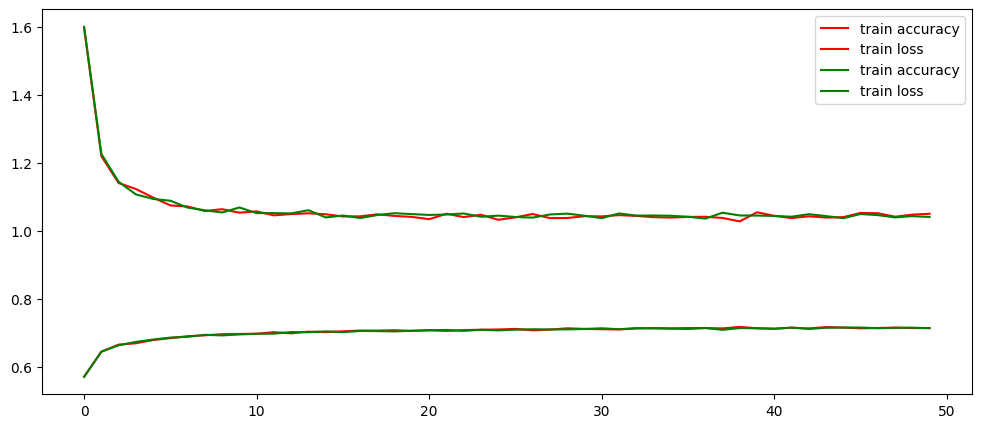

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(hist__6.history["accuracy"], label="train accuracy",color='red')
ax.plot(hist__6.history["loss"], label="train loss",color='red')
ax.plot(hist__5.history["accuracy"], label="train accuracy",color='green')
ax.plot(hist__5.history["loss"], label="train loss",color='green')
ax.legend()